## Table of Contents<a class="anchor" id="top"></a>
0. [Import Libraries](#import-libraries)
1. [Import Data](#import-data)
2. [Data Exploration](#data-exploration)
3. [Data Cleaning](#data-cleaning)
4. [Data Preparation](#data-preparation)

### Data Dictionary
<style>
    /* Optional: CSS for styling */
    .image-container {
      max-width: 100%; /* Ensure the image container respects the screen width */
    }
</style>
<div class="image-container">
    <picture>  
      <source media="(min-width: 769px)" srcset="./data-dictionary.png">
      <source media="(min-width: 481px) and (max-width: 768px)" srcset="./data-dictionary.png">
      <img src="./data-dictionary.png" alt="Stockton Police Responses">
    </picture>
</div>

### <a class="anchor" id="import-libraries">0. Import Libraries</a>
###### [Back to top](#top)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

### <a class="anchor" id="import-data">1. Import Data</a>
###### [Back to top](#top)

In [2]:
data_dir = './'
csv_file = os.path.join(data_dir, 'SPDService_Calls.csv')

df = pd.read_csv(csv_file)
df.head(5)

,CALL_NO,REPORT_NO,CALL_TYPE_ORIG,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,PRIORITY,BEAT,CURR_DGROUP,REP_DIST,CALL_ENTRY_DATE,FIRST_Cross_Street,X,Y,CALL_ENTRY_TIME_FORMATTED,DISTRICTNAME
0,P190430698,NaN,945,945,AMBULANCE REQ,1.0,VN,VAL,346,2019-02-12 00:00:00.0000000,HAMMER & KATHLEEN,-121.296873,38.020917,14:48:36,Valley Oak
1,P190430699,PD190005995,962,950,OBTAIN REPORT,3.0,CS,CIV,109,2019-02-12 00:00:00.0000000,EL DORADO & MARKET,-121.289518,37.951718,14:50:06,Civic
2,P190430699,PD190005995,962,950,OBTAIN REPORT,3.0,CS,CIV,109,2019-02-12 00:00:00.0000000,EL DORADO & MARKET,-121.289518,37.951718,14:50:06,Civic
3,P190430701,NaN,925R,925R,REPORTS,2.0,CS,CIV,109,2019-02-12 00:00:00.0000000,EL DORADO & MARKET,-121.289518,37.951718,14:50:45,Civic
4,P190430704,NaN,WELCK,WELCK,WELFARE CHECK,2.0,SE,SEA,106,2019-02-12 00:00:00.0000000,LAFAYETTE & SAN JOAQUIN,-121.286390,37.950209,14:52:25,Seaport


### <a class="anchor" id="data-exploration">2. Data Exploration</a>
###### [Back to top](#top)

In [3]:
df.columns

Index(['CALL_NO', 'REPORT_NO', 'CALL_TYPE_ORIG', 'CALL_TYPE_FINAL',
       'CALL_TYPE_FINAL_D', 'PRIORITY', 'BEAT', 'CURR_DGROUP', 'REP_DIST',
       'CALL_ENTRY_DATE', 'FIRST_Cross_Street', 'X', 'Y',
       'CALL_ENTRY_TIME_FORMATTED', 'DISTRICTNAME'],
      dtype='object')

In [4]:
df = df[['DISTRICTNAME','REP_DIST','CALL_TYPE_FINAL','CALL_TYPE_FINAL_D','PRIORITY','FIRST_Cross_Street','CALL_ENTRY_DATE', 'CALL_ENTRY_TIME_FORMATTED']]
df.head(10)

,DISTRICTNAME,REP_DIST,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,PRIORITY,FIRST_Cross_Street,CALL_ENTRY_DATE,CALL_ENTRY_TIME_FORMATTED
0,Valley Oak,346,945,AMBULANCE REQ,1.0,HAMMER & KATHLEEN,2019-02-12 00:00:00.0000000,14:48:36
1,Civic,109,950,OBTAIN REPORT,3.0,EL DORADO & MARKET,2019-02-12 00:00:00.0000000,14:50:06
2,Civic,109,950,OBTAIN REPORT,3.0,EL DORADO & MARKET,2019-02-12 00:00:00.0000000,14:50:06
3,Civic,109,925R,REPORTS,2.0,EL DORADO & MARKET,2019-02-12 00:00:00.0000000,14:50:45
4,Seaport,106,WELCK,WELFARE CHECK,2.0,LAFAYETTE & SAN JOAQUIN,2019-02-12 00:00:00.0000000,14:52:25
5,Seaport,106,WELCK,WELFARE CHECK,2.0,LAFAYETTE & SAN JOAQUIN,2019-02-12 00:00:00.0000000,14:52:25
6,Seaport,230,481,HIT RUN NO INJUR,2.0,IRENE & STOCKTON,2019-02-12 00:00:00.0000000,14:55:18
7,Valley Oak,367,415HW,CELL 911 HANG UP,1.0,FRED RUSSO & JAYDEN,2019-02-12 00:00:00.0000000,15:06:55
8,Valley Oak,346,415L,CLEAR THE LOT,4.0,KNICKERBOCKER & NEW YORK,2019-02-12 00:00:00.0000000,15:06:53
9,Valley Oak,367,415HW,CELL 911 HANG UP,1.0,FRED RUSSO & JAYDEN,2019-02-12 00:00:00.0000000,15:07:10


In [5]:
# change data type for Call Entry Date to datetime
df['CALL_ENTRY_DATE'] = pd.to_datetime(df['CALL_ENTRY_DATE'])

df.head(2)

,DISTRICTNAME,REP_DIST,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,PRIORITY,FIRST_Cross_Street,CALL_ENTRY_DATE,CALL_ENTRY_TIME_FORMATTED
0,Valley Oak,346,945,AMBULANCE REQ,1.0,HAMMER & KATHLEEN,2019-02-12,14:48:36
1,Civic,109,950,OBTAIN REPORT,3.0,EL DORADO & MARKET,2019-02-12,14:50:06


In [6]:
df['PRIORITY'].value_counts()

PRIORITY
1.0    1103356
2.0     735322
3.0     404969
4.0     256362
9.0     131233
5.0      80970
Name: count, dtype: int64

In [7]:
df['REP_DIST'].value_counts()

REP_DIST
109     174315
346      45597
105      42846
326      35516
102      35393
         ...  
7394         3
268          3
3372         3
7640         1
7632         1
Name: count, Length: 460, dtype: int64

<Axes: xlabel='REP_DIST'>

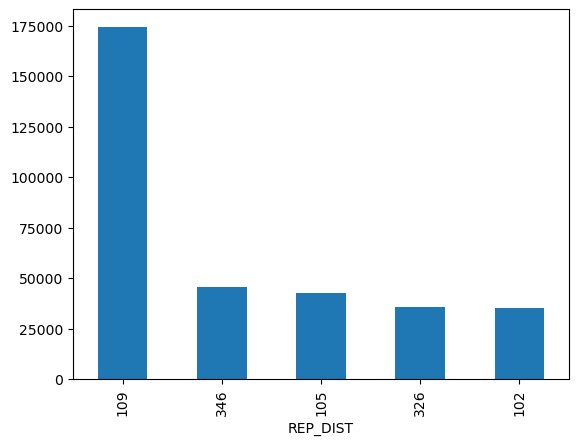

In [8]:
df['REP_DIST'].value_counts().head(5).plot(kind='bar')

In [9]:
df['CALL_TYPE_FINAL_D'].value_counts()

CALL_TYPE_FINAL_D
CELL 911 HANG UP    263784
AMBULANCE REQ       199427
CHECK ON            108730
DISTURBANCE         104234
FIRE                 91107
                     ...  
POSS 957 ??              1
*TRU                     1
NEIGHGBOR                1
HANGUN                   1
215 ATTEMPT              1
Name: count, Length: 12846, dtype: int64

In [10]:
# value count of call type final d column with top 5 values

df['CALL_TYPE_FINAL_D'].value_counts().head(5)

CALL_TYPE_FINAL_D
CELL 911 HANG UP    263784
AMBULANCE REQ       199427
CHECK ON            108730
DISTURBANCE         104234
FIRE                 91107
Name: count, dtype: int64

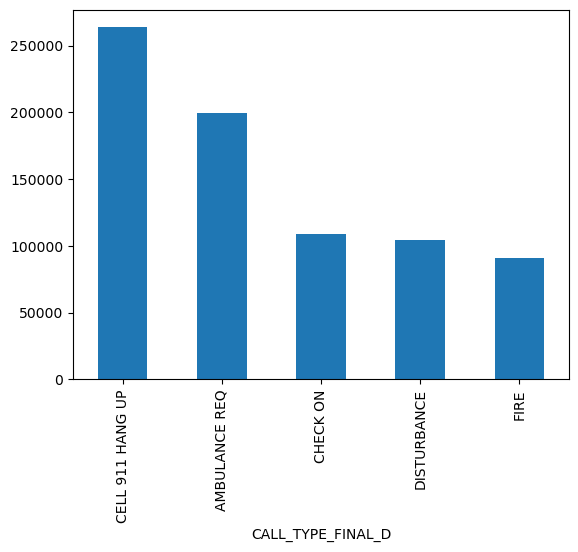

In [11]:
# value count of call type final d column with top 5 values in a plot

df['CALL_TYPE_FINAL_D'].value_counts().head(5).plot(kind='bar')
plt.show()

In [12]:
# search dataframe for null values

df.isnull().sum()

DISTRICTNAME                     0
REP_DIST                         0
CALL_TYPE_FINAL                  0
CALL_TYPE_FINAL_D                0
PRIORITY                     50619
FIRST_Cross_Street            1473
CALL_ENTRY_DATE                  0
CALL_ENTRY_TIME_FORMATTED        0
dtype: int64

In [13]:
df.dtypes

DISTRICTNAME                         object
REP_DIST                              int64
CALL_TYPE_FINAL                      object
CALL_TYPE_FINAL_D                    object
PRIORITY                            float64
FIRST_Cross_Street                   object
CALL_ENTRY_DATE              datetime64[ns]
CALL_ENTRY_TIME_FORMATTED            object
dtype: object

### <a class="anchor" id="data-cleaning">3. Data Cleaning</a>
###### [Back to top](#top)

#### Rename Columns

In [14]:
df = df.rename(columns={'DISTRICTNAME':'DISTRICT_NAME', 'REP_DIST':'REP_DIST', 'CALL_TYPE_FINAL': 'CALL_TYPE','CALL_TYPE_FINAL_D': 'CALL_TYPE_DESCRIPTION','PRIORITY': 'PRIORITY','FIRST_Cross_Street':'CROSS_STREET', 'CALL_ENTRY_DATE':'CALL_ENTRY_DATE', 'CALL_ENTRY_TIME_FORMATTED':'CALL_ENTRY_TIME'})

df.head(2)

,DISTRICT_NAME,REP_DIST,CALL_TYPE,CALL_TYPE_DESCRIPTION,PRIORITY,CROSS_STREET,CALL_ENTRY_DATE,CALL_ENTRY_TIME
0,Valley Oak,346,945,AMBULANCE REQ,1.0,HAMMER & KATHLEEN,2019-02-12,14:48:36
1,Civic,109,950,OBTAIN REPORT,3.0,EL DORADO & MARKET,2019-02-12,14:50:06


#### Check for null values and drop null values if it makes sense

In [15]:
# assign default value of 1 to null values in PRIORITY column

df['PRIORITY'] = df['PRIORITY'].fillna(1)

In [19]:
# drop null values based on CROSS_STREET

df = df.dropna(subset=['CROSS_STREET'])

In [21]:
# time_str = df['CALL_ENTRY_TIME'].values
# time_dt = pd.to_datetime(time_str, format='%H:%M:%S')
# time_regular = time_dt.strftime('%I:%M:%S %p')    
# time_regular
# df['CALL_ENTRY_TIME'] = df['CALL_ENTRY_TIME'].apply(time_regular)
# df.head(5)
df.isna().sum()

DISTRICT_NAME            0
REP_DIST                 0
CALL_TYPE                0
CALL_TYPE_DESCRIPTION    0
PRIORITY                 0
CROSS_STREET             0
CALL_ENTRY_DATE          0
CALL_ENTRY_TIME          0
dtype: int64

#### Remove Special Characters

In [22]:
pattern = r'[^\w\s]'

df['CALL_TYPE_DESCRIPTION'] = df['CALL_TYPE_DESCRIPTION'].apply(lambda x: re.sub(pattern, '', x))

df['CALL_TYPE_DESCRIPTION']

0           AMBULANCE REQ
1           OBTAIN REPORT
2           OBTAIN REPORT
3                 REPORTS
4           WELFARE CHECK
                ...      
2762826        LOUD MUSIC
2762827     AMBULANCE REQ
2762828              FIRE
2762829    ALARM SOUNDING
2762830              FIRE
Name: CALL_TYPE_DESCRIPTION, Length: 2761358, dtype: object

In [25]:
df['CALL_TYPE'] = df['CALL_TYPE'].apply(lambda x: re.sub(pattern, '', x))

df['CALL_TYPE']

0            945
1            950
2            950
3           925R
4          WELCK
           ...  
2762826     415E
2762827      945
2762828      929
2762829      933
2762830      929
Name: CALL_TYPE, Length: 2761358, dtype: object

#### Strip Whitespace from all columns

In [26]:
cleaned_df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

cleaned_df.head(10)

,DISTRICT_NAME,REP_DIST,CALL_TYPE,CALL_TYPE_DESCRIPTION,PRIORITY,CROSS_STREET,CALL_ENTRY_DATE,CALL_ENTRY_TIME
0,Valley Oak,346,945,AMBULANCE REQ,1.0,HAMMER & KATHLEEN,2019-02-12,14:48:36
1,Civic,109,950,OBTAIN REPORT,3.0,EL DORADO & MARKET,2019-02-12,14:50:06
2,Civic,109,950,OBTAIN REPORT,3.0,EL DORADO & MARKET,2019-02-12,14:50:06
3,Civic,109,925R,REPORTS,2.0,EL DORADO & MARKET,2019-02-12,14:50:45
4,Seaport,106,WELCK,WELFARE CHECK,2.0,LAFAYETTE & SAN JOAQUIN,2019-02-12,14:52:25
5,Seaport,106,WELCK,WELFARE CHECK,2.0,LAFAYETTE & SAN JOAQUIN,2019-02-12,14:52:25
6,Seaport,230,481,HIT RUN NO INJUR,2.0,IRENE & STOCKTON,2019-02-12,14:55:18
7,Valley Oak,367,415HW,CELL 911 HANG UP,1.0,FRED RUSSO & JAYDEN,2019-02-12,15:06:55
8,Valley Oak,346,415L,CLEAR THE LOT,4.0,KNICKERBOCKER & NEW YORK,2019-02-12,15:06:53
9,Valley Oak,367,415HW,CELL 911 HANG UP,1.0,FRED RUSSO & JAYDEN,2019-02-12,15:07:10


### <a class="anchor" id="data-preparation">4. Data Preparation</a>
###### [Back to top](#top)

In [29]:
for year, group in cleaned_df.groupby(cleaned_df['CALL_ENTRY_DATE'].dt.year):
    output_dir = './'
    csv_file = os.path.join(output_dir, f'cleaned_data_{year}.csv')
    group.to_csv(csv_file, index=False)
    
    print(f'Exported data for year {year} to {csv_file}')

Exported data for year 2019 to ./cleaned_data_2019.csv
Exported data for year 2020 to ./cleaned_data_2020.csv
Exported data for year 2021 to ./cleaned_data_2021.csv
Exported data for year 2022 to ./cleaned_data_2022.csv
Exported data for year 2023 to ./cleaned_data_2023.csv
Exported data for year 2024 to ./cleaned_data_2024.csv
